# Calculation of the DY cross section
First import from ROOT libraries which  are needed

In [1]:
from  ROOT import TH1D, TCanvas, gRandom
from  math import log, sqrt, pi
import  lhapdf

Welcome to JupyROOT 6.12/07


Define the cross section formula for DY q + qb -> mu+ mu-, without  the charge of the quark, according to formula (48.3) in [pdgReview](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-cross-section-formulae.pdf), notice different color factor due to the inverted process

In [2]:
def sigma(shat):
    Nc = 3 #number of colors 
    aem = 1./137 #alphaEM
    ge2mb = 0.389379 #from natural units to mb
    return 1./Nc * 4*pi*aem**2/(3*shat) *ge2mb

Define PDF to be used

In [3]:
name = "MRST2007lomod"	
pdf = lhapdf.getPDFSet(name).mkPDF(0)

LHAPDF 6.2.1 loading /lhapdf/install/share/LHAPDF/MRST2007lomod/MRST2007lomod_0000.dat
MRST2007lomod PDF set, member #0, version 2; LHAPDF ID = 20650


Define histograms to be filed

In [4]:
hEta  = TH1D("eta", "Eta", 20, -12, 12)
hMass = TH1D("mass", "Mass", 20, 40, 60)

Define the beam energy of the protons

In [5]:
Eb = 6500
xmin = 1e-5
xmax = pdf.xMax

Define the number of points to be generated

In [6]:
npoints = 1000000

Generate npoints of "events"

In [7]:
s1 = s2 = 0
for n in range(npoints):
    #Importance sampling in x1 and x2
    x1 = xmin * (xmax/xmin)**gRandom.Uniform()
    x2 = xmin * (xmax/xmin)**gRandom.Uniform()
    wgt = log(xmax/xmin)**2 * x1 * x2
    
    #mass and eta of DY
    m   = 2*Eb*sqrt(x1*x2) 
    eta = 1./2*log(x1/x2)
    #Accepted mass range
    if m < 40 or m > 60:
        continue

    #to simplify calculation
    def q(id, x):
        return pdf.xfxQ(id, x, m) / x
    def qq(id):
        return q(id,x1)*q(-id,x2) + q(-id,x1)*q(id,x2) 

    # u*ub + c*cb
    UP = qq(2) + qq(4)
    # d*db + s*sb + b*bb 
    DN = qq(1) + qq(3) + qq(5)

    ##apply charges of quarks
    res = ((2./3)**2 * UP + (1./3)**2 * DN) * sigma(m*m)
    f = res * wgt

    #fill histograms
    hEta.Fill(eta, f)
    hMass.Fill(m,  f)
    s1 += f
    s2 += f**2

Divide by npoints

In [8]:
avg  = s1/npoints
avg2 = s2/npoints

Calculate the error

In [9]:
sigma2 = avg2 - avg**2
err = sqrt(sigma2/npoints)

Print the x-section

In [10]:
print 'Cross section for pp -> mu+mu- is ', avg, '+-', err, 'mb'

Cross section for pp -> mu+mu- is  1.11586761149e-07 +- 4.6313480673e-10 mb


Plot histograms

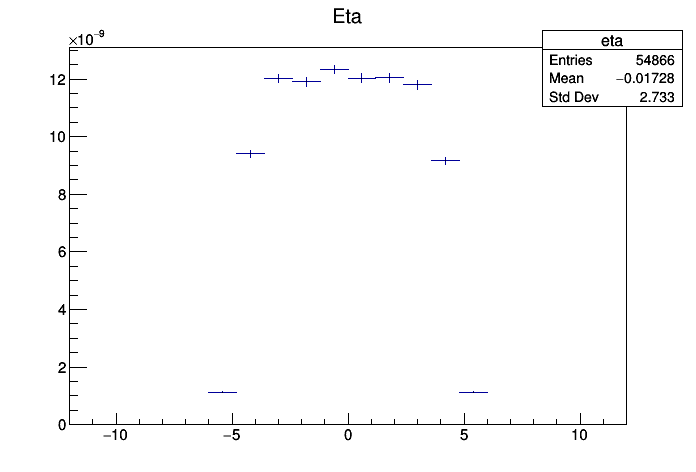

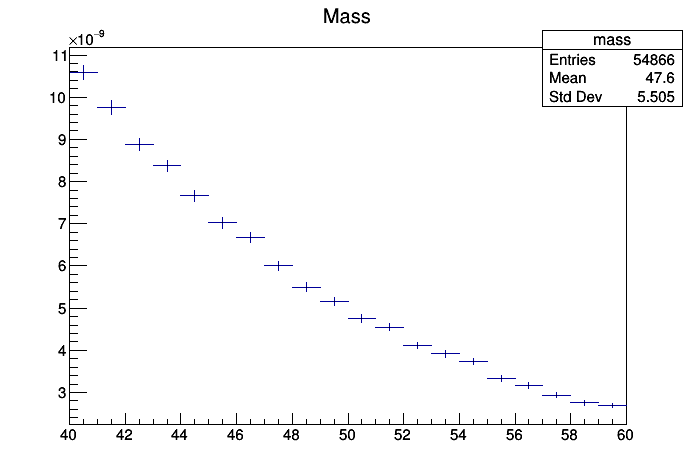

In [11]:
c = TCanvas()
hEta.Scale(1./npoints, "width")
hEta.Draw()
c.Draw()
d = TCanvas()
hMass.Scale(1./npoints, "width")
hMass.Draw()
d.Draw()